# Task-02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/c/titanic/data

In [1]:
# Import necessary libraries
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Load the Titanic dataset
titanic_data=pd.read_csv('train.csv')

In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Check for missing values in the dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Data Cleaning: Handle missing values
# Let's fill missing age values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [10]:
# Fill missing values in the Embarked column with the most common value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [11]:
# Drop the Cabin column due to a large number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)


In [12]:
# Check for missing values in the dataset
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

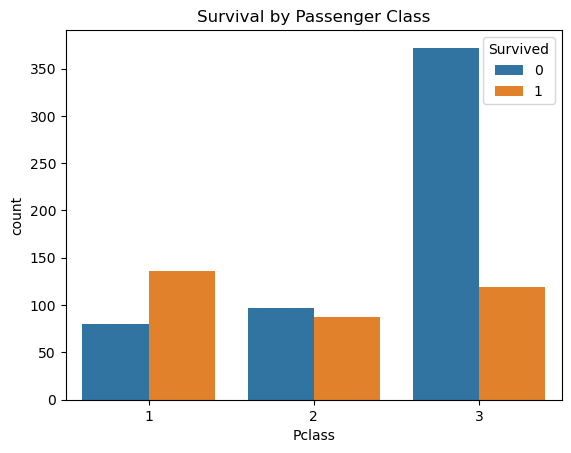

In [13]:
# EDA: Explore relationships between variables
# Visualization of survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.show()


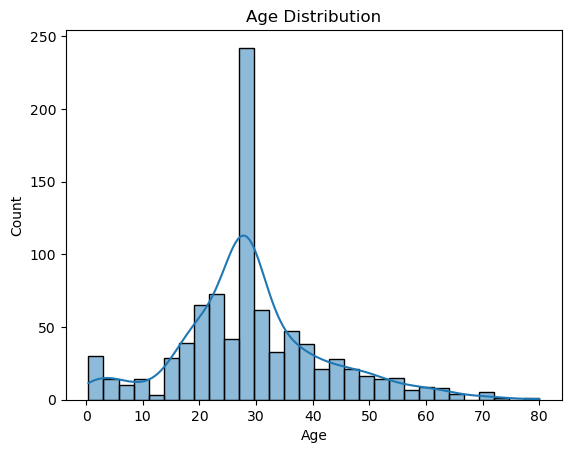

In [14]:
# Explore age distribution
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


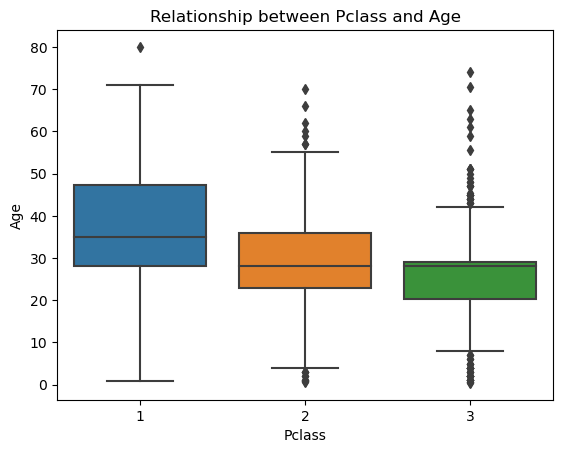

In [15]:
# Relationship between Pclass and Age
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('Relationship between Pclass and Age')
plt.show()


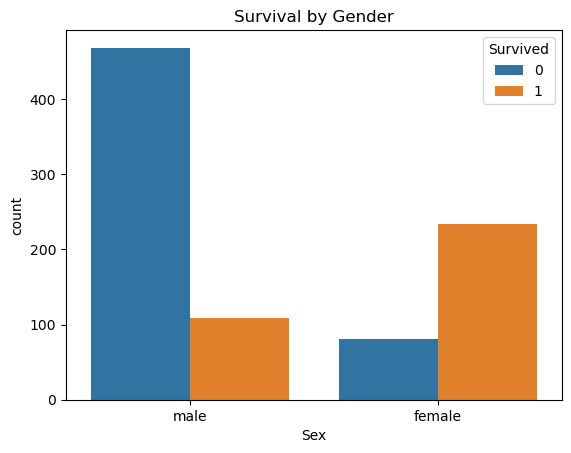

In [16]:
# Explore the survival rate based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Gender')
plt.show()

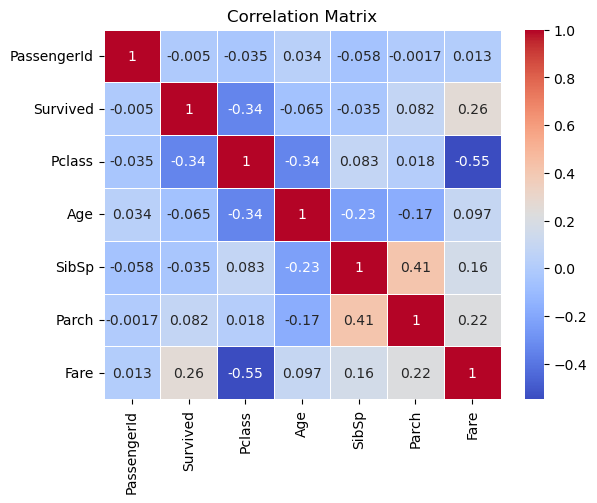

In [17]:
# Drop non-numeric columns before calculating correlation matrix
numeric_columns = titanic_data.select_dtypes(include=['int64', 'float64']).columns
titanic_data_numeric = titanic_data[numeric_columns]

# Calculate correlation matrix
correlation_matrix = titanic_data_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()